<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Setup-notebook" data-toc-modified-id="Setup-notebook-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Setup notebook</a></span></li><li><span><a href="#Import-and-clean-Yellow-Taxi-data" data-toc-modified-id="Import-and-clean-Yellow-Taxi-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import and clean Yellow Taxi data</a></span><ul class="toc-item"><li><span><a href="#Download-the-data-and-move-it-to-PUIData" data-toc-modified-id="Download-the-data-and-move-it-to-PUIData-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Download the data and move it to PUIData</a></span></li><li><span><a href="#Read-in-only-one-observation-every-1,000-observations" data-toc-modified-id="Read-in-only-one-observation-every-1,000-observations-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Read in only one observation every 1,000 observations</a></span></li><li><span><a href="#Drop-unnecessary-columns" data-toc-modified-id="Drop-unnecessary-columns-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Drop unnecessary columns</a></span></li><li><span><a href="#Calculate-trip-duration-and-tip-amount" data-toc-modified-id="Calculate-trip-duration-and-tip-amount-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Calculate trip duration and tip amount</a></span></li><li><span><a href="#Get-Zipcodes" data-toc-modified-id="Get-Zipcodes-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Get Zipcodes</a></span></li></ul></li><li><span><a href="#Import-and-clean-up-zip-code-income-data" data-toc-modified-id="Import-and-clean-up-zip-code-income-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Import and clean up zip code income data</a></span></li><li><span><a href="#Aggregate-the-data" data-toc-modified-id="Aggregate-the-data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Aggregate the data</a></span></li><li><span><a href="#Plot-the-distribution-of-tip-percentages-and-describe-its-first-and-second-moment" data-toc-modified-id="Plot-the-distribution-of-tip-percentages-and-describe-its-first-and-second-moment-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Plot the distribution of tip percentages and describe its first and second moment</a></span></li><li><span><a href="#Test-if-the-distribution-is-consistent-with-a-Gaussian" data-toc-modified-id="Test-if-the-distribution-is-consistent-with-a-Gaussian-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Test if the distribution is consistent with a Gaussian</a></span></li><li><span><a href="#Fit-a-line-to-taxi-fare-vs-trip-duration-and-to-taxi-fare-vs-trip-distance-to-decide-which-variable-between-duration-and-distance-&quot;contains-more-information&quot;-when-used-with-the-fare" data-toc-modified-id="Fit-a-line-to-taxi-fare-vs-trip-duration-and-to-taxi-fare-vs-trip-distance-to-decide-which-variable-between-duration-and-distance-&quot;contains-more-information&quot;-when-used-with-the-fare-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Fit a line to taxi fare vs trip duration and to taxi fare vs trip distance to decide which variable between duration and distance "contains more information" when used with the fare</a></span></li><li><span><a href="#Remove-outliers-and-assess-if-this-has-an-effect-this-has-on-the-model" data-toc-modified-id="Remove-outliers-and-assess-if-this-has-an-effect-this-has-on-the-model-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Remove outliers and assess if this has an effect this has on the model</a></span></li><li><span><a href="#Create-two-multivariate-linear-model-to-predict-the-tip-percentage" data-toc-modified-id="Create-two-multivariate-linear-model-to-predict-the-tip-percentage-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Create two multivariate linear model to predict the tip percentage</a></span></li><li><span><a href="#Compare-multivariate-linear-model-to-predict-the-tip-percentage-and-assess-importance-of-socioeconomic-variables" data-toc-modified-id="Compare-multivariate-linear-model-to-predict-the-tip-percentage-and-assess-importance-of-socioeconomic-variables-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Compare multivariate linear model to predict the tip percentage and assess importance of socioeconomic variables</a></span></li><li><span><a href="#Look-at-this-all-again-with-actual-tips" data-toc-modified-id="Look-at-this-all-again-with-actual-tips-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Look at this all again with actual tips</a></span></li></ul></div>

# PUI2017 Midterm
**NetID:** sac820@nyu.edu

## Setup notebook

In [264]:
from __future__ import print_function, division
import os, shutil
import geopandas as gp
import pandas as pd
import xlrd
from pandas.plotting import scatter_matrix
import numpy as np
import pylab as pl
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import scipy

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/seanandrewchen/Dropbox/academics/graduate/nyu-cusp/semester_01/urban-informatics/coding/PUI2017/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['mean']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## Import and clean Yellow Taxi data

### Download the data and move it to PUIData

In [ ]:
os.system("curl -O https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2009-02.csv");
path = os.getcwd()
oldFile = path + "/" + "yellow_tripdata_2009-02.csv"
newFile = os.getenv("PUIDATA") + "yellow-taxi.csv"
shutil.move(oldFile, newFile);

### Read in only one observation every 1,000 observations

In [123]:
taxiData = pd.read_csv(newFile)

In [124]:
taxiData = taxiData[::1000]

### Drop unnecessary columns

In [125]:
keepColumns = ['Trip_Pickup_DateTime', 'Trip_Dropoff_DateTime','Trip_Distance', 
               'Start_Lon', 'Start_Lat', 'End_Lon', 'End_Lat', 'Fare_Amt', 'Tip_Amt']
taxiData = pd.DataFrame(taxiData, columns=keepColumns)
taxiData = taxiData.dropna()

### Calculate trip duration and tip amount

In [126]:
taxiData['Trip_Dropoff_DateTime']  = pd.to_datetime(taxiData['Trip_Dropoff_DateTime'] )
taxiData['Trip_Pickup_DateTime'] = pd.to_datetime(taxiData['Trip_Pickup_DateTime'])
taxiData['Duration'] = taxiData['Trip_Dropoff_DateTime'] - taxiData['Trip_Pickup_DateTime']
taxiData['Tip Percentage'] = (taxiData['Tip_Amt'] / taxiData['Fare_Amt']) * 100

### Get Zipcodes

In [127]:
os.system("curl -O http://cosmo.nyu.edu/~fb55/data/departureZIP.csv");
path = os.getcwd()
oldFile = path + "/" + "departureZIP.csv"
newFile = os.getenv("PUIDATA") + "departureZIP.csv"
shutil.move(oldFile, newFile);
departureZIP = pd.read_csv(newFile)

In [128]:
os.system("curl -O http://cosmo.nyu.edu/~fb55/data/destinationZIP.csv");
path = os.getcwd()
oldFile = path + "/" + "destinationZIP.csv"
newFile = os.getenv("PUIDATA") + "destinationZIP.csv"
shutil.move(oldFile, newFile);
destinationZIP = pd.read_csv(newFile)

In [130]:
keepColumns = ['Start_Lon', 'Start_Lat','ZIPCODE']
departureZIP = pd.DataFrame(departureZIP, columns=keepColumns)

In [131]:
keepColumns = ['End_Lon', 'End_Lat','ZIPCODE']
destinationZIP = pd.DataFrame(destinationZIP, columns=keepColumns)

In [134]:
taxiData = taxiData.merge(departureZIP, on=['Start_Lon', 'Start_Lat'])
taxiData = taxiData.merge(destinationZIP, on=['End_Lon', 'End_Lat'])

In [136]:
keepColumns = ['Trip_Distance', 'Fare_Amt','Tip_Amt', 'Duration', 'Tip Percentage', 'ZIPCODE_x', 
               'ZIPCODE_y']
taxiData = pd.DataFrame(taxiData, columns=keepColumns)
taxiData = taxiData.dropna()

In [138]:
taxiData.columns = ['Trip Distance', 'Fare', 'Tip', 'Duration', 'Tip Percent', 'Departure', 'Destination']

## Import and clean up zip code income data

In [141]:
os.system("curl -O http://www.nber.org/tax-stats/zipcode/2009/09zp33ny.xls");
path = os.getcwd()
oldFile = path + "/" + "09zp33ny.xls"
newFile = os.getenv("PUIDATA") + "income-data.xls"
shutil.move(oldFile, newFile);

In [157]:
incomeData = pd.read_excel(newFile, header=3, index_col="ZIP\ncode [1]")

In [158]:
keepColumns = ['Number of returns', 'Number of joint returns','Number of dependents', 
               'Adjusted gross income (AGI)']
incomeData = pd.DataFrame(incomeData, columns=keepColumns)
incomeData = incomeData.dropna()

In [164]:
incomeData['Population'] = incomeData['Number of returns'] + incomeData['Number of joint returns'] + incomeData['Number of dependents']
incomeData['Income Per Capita'] = incomeData['Adjusted gross income (AGI)'] / incomeData['Population']

In [169]:
keepColumns = ['Population', 'Income Per Capita']
incomeData = pd.DataFrame(incomeData, columns=keepColumns)
incomeData = incomeData.dropna()
incomeData.reset_index

In [172]:
incomeData['ZIP Code'] = incomeData.index.astype(float)
incomeData['ZIP Code'] = incomeData.index.astype(int)

In [182]:
incomeData = incomeData.dropna()

In [206]:
incomeData = incomeData[::7]

## Aggregate the data

Data aggregation task: Join the datasets so that your data contains at least: trip duration, trip distance, fare amount, tip percentage, departure zipcode income, and destination zipcode income¶

In [207]:
taxiData.head()

,Trip Distance,Fare,Tip,Duration,Tip Percent,Departure,Destination
0,1.6,6.9,0.0,00:08:39,0.000000,10036,10011
1,1.0,5.3,0.0,00:05:28,0.000000,10028,10024
2,1.7,6.6,0.0,00:05:55,0.000000,10022,10023
3,0.0,3.0,7.0,00:00:12,233.333333,10019,10019
4,3.2,14.2,0.0,00:22:12,0.000000,10012,10022


In [208]:
incomeData.head()

,Population,Income Per Capita,ZIP Code
ZIP code [1],,,
0,17016108.0,34.735223,0
10001,17426.0,94.386319,10001
10002,77558.0,21.312824,10002
10003,38156.0,119.356720,10003
10004,3231.0,150.291551,10004


In [239]:
data1 = taxiData.merge(incomeData, left_on='Departure', right_on='ZIP Code')
data1=data1.rename(columns = {'Income Per Capita':'Departure Income'})

trip duration, trip distance, fare amount, tip percentage, departure zipcode income, and destination zipcode income¶

In [240]:
data2 = taxiData.merge(incomeData, left_on='Destination', right_on='ZIP Code')
data2=data2.rename(columns = {'Income Per Capita':'Destination Income'})

In [242]:
data = data1
data['Destination Income'] = data2['Destination Income']

In [248]:
keepColumns = ['Trip Distance', 'Duration', 'Fare', 'Tip Percent', 'Departure Income', 'Destination Income']
data = pd.DataFrame(data, columns=keepColumns)
data = data.dropna()

## Plot the distribution of tip percentages and describe its first and second moment

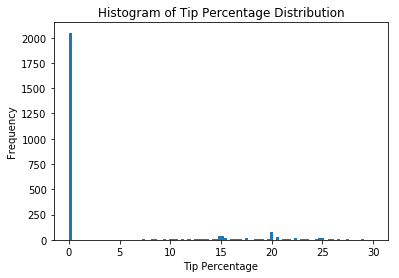

In [254]:
pl.hist(data['Tip Percent'], 100, (0,30));
title("Histogram of Tip Percentage Distribution");
xlabel("Tip Percentage");
ylabel("Frequency");

In [255]:
#moment 1 is the mean
mean = mean(data['Tip Percent'])
print('The mean of the distribution of tip percentage is: ', mean)

The mean of the distribution of tip percentage is:  4.70509669212


In [256]:
#moment 2 is the variance
variance = sqrt(std(data['Tip Percent']))
print('The mean of the distribution of tip percentage is: ', variance)

The mean of the distribution of tip percentage is:  3.35299063592


## Test if the distribution is consistent with a Gaussian

In [258]:
#Create a Gaussian distribution with which to compare
np.random.seed(100)
gaussDistribution = np.random.normal(0, 1, 100)

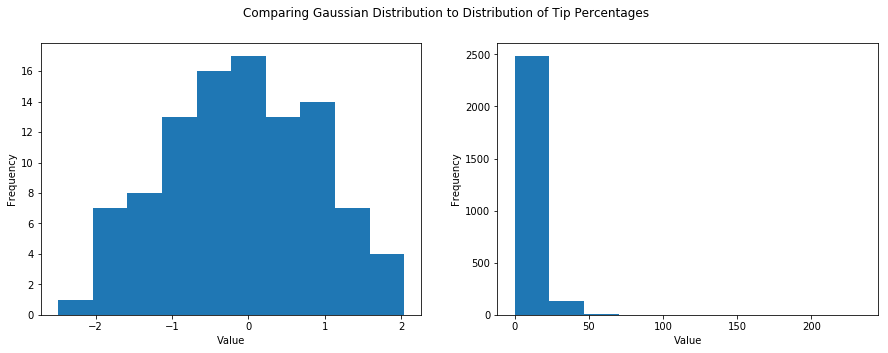

In [262]:
fig = pl.figure(figsize=(15,5))
fig.suptitle('Comparing Gaussian Distribution to Distribution of Tip Percentages')

ax1 = fig.add_subplot(121)
ax1.hist(gaussDistribution)
ax1.set_xlabel("Value")
ax1.set_ylabel("Frequency")
ax1.set_ylim()

ax2 = fig.add_subplot(122)
ax2.hist(data['Tip Percent'])
ax2.set_xlabel("Value")
ax2.set_ylabel("Frequency")
ax2.set_ylim()
pl.show()

**Figure 1:** These don't look very similar...

In [265]:
scipy.stats.kstest(data['Tip Percent'], "norm")

KstestResult(statistic=0.5, pvalue=0.0)

**Interpretation:** With a p-value of zero, we have to reject the null that these two distributions are identical. Thus we can say that the distribution of tips is not Gaussian.

## Fit a line to taxi fare vs trip duration and to taxi fare vs trip distance to decide which variable between duration and distance "contains more information" when used with the fare

In [306]:
#We have to turn a time type into a float
duration = pd.DataFrame(data['Duration']).apply(np.float32)
X = sm.add_constant(duration)
durationModel = sm.OLS(endog=data['Fare'], exog=X).fit()

In [307]:
X = sm.add_constant(data['Trip Distance'])
distanceModel = sm.OLS(endog=data['Fare'], exog=X).fit()

In [308]:
durationModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Fare   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.304
Method:                 Least Squares   F-statistic:                     1154.
Date:                Thu, 26 Oct 2017   Prob (F-statistic):          4.14e-210
Time:                        20:02:31   Log-Likelihood:                -8100.8
No. Observations:                2635   AIC:                         1.621e+04
Df Residuals:                    2633   BIC:                         1.622e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.9401      0.142     41.783      0.000       5.661       6.219
Duration    5.054e-12   1.49e-13     33.973      0.000    4.76e-12    5.35e-12
==============================================================================
Omnibus:                     2443.686   Durbin-Watson:                   1.703
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2574424.999
Skew:                          -3.275   Prob(JB):                         0.00
Kurtosis:                     155.988   Cond. No.                     1.33e+12
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.33e+12. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [309]:
distanceModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Fare   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                 1.734e+04
Date:                Thu, 26 Oct 2017   Prob (F-statistic):               0.00
Time:                        20:02:35   Log-Likelihood:                -5910.4
No. Observations:                2635   AIC:                         1.182e+04
Df Residuals:                    2633   BIC:                         1.184e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             3.7627      0.061     61.483      0.000       3.643       3.883
Trip Distance     2.2195      0.017    131.664      0.000       2.186       2.253
==============================================================================
Omnibus:                     3829.358   Durbin-Watson:                   1.889
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3492086.595
Skew:                           8.148   Prob(JB):                         0.00
Kurtosis:                     180.598   Cond. No.                         5.19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Interpretation:** The distance model has a better R squared value but logically in my mind, I think duration is more important as distances are usually pretty small no matter what in NYC. It's the traffic that matters...

In [ ]:
durationValues = durationModel.fittedvalues
distanceValues = distanceModel.fittedvalues

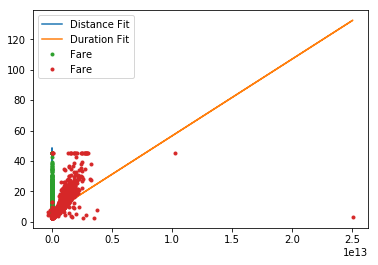

In [315]:
pl.plot(data['Trip Distance'], distanceValues, '-', label='Distance Fit')
pl.plot(data['Duration'], durationValues, '-', label='Duration Fit')
pl.plot(data['Trip Distance'], data['Fare'], '.')
pl.plot(data['Duration'], data['Fare'], '.')
ax.set_xlabel("Duration or Distance of Trip")
ax.set_ylabel("Fare of Trip")
pl.legend()
pl.show()

**Figure 2:** It does look like distance explains more than duration as its points are all along that line. But still this does not make sense as in NYC, distance in actual miles is not that much but it is time that really takes its toll in terms of fares. 

## Remove outliers and assess if this has an effect this has on the model

In [316]:
print(data.describe())

       Trip Distance                Duration         Fare  Tip Percent  \
count    2635.000000                    2635  2635.000000  2635.000000   
mean        2.496641  0 days 00:11:05.622390     9.303985     4.705097   
std         2.636118  0 days 00:11:25.960388     6.279512    11.244680   
min         0.000000       -1 days +23:55:00     2.500000     0.000000   
25%         1.000000         0 days 00:05:51     5.700000     0.000000   
50%         1.660000         0 days 00:09:00     7.700000     0.000000   
75%         2.900000         0 days 00:14:00    10.900000     0.000000   
max        20.200000         0 days 06:57:33    45.000000   233.333333   

       Departure Income  Destination Income  
count       2635.000000         2635.000000  
mean         143.004242          138.413306  
std           67.648740           70.736313  
min           15.122242            6.655770  
25%          111.452011           99.700046  
50%          137.214153          121.765217  
75%        

**Interpretation:** We can see that there is a massive amount of no tips! It then zooms up to 233%! This 233% is definitely an outlier! (Who gives that high of a tip?! You made outta money or something?!) Let's drop tip percents that are above 50%. There's also an odd negative time. Not sure how that happened but let's fix that. And there's a 6 hour trip! Oh god. That's awful. Let's get rid of that too. Oh and that 20 miles...That's too high too!

In [321]:
#Our duration is in an annoying deltatime dtype and I don't have enough time to figure out
#how to change this cause I've never used this before so I'm gonna
#Coerce it and it turns it into nanoseconds so I divide them by how many
#nanoseconds are in an hour to get a rough approximation of an hour
data['Duration'] = pd.to_numeric(data['Duration'], errors='coerce')
data['Duration'] = data['Duration'] / 3.6e+12

In [343]:
newData = data[data['Tip Percent'] < 50]
newData = newData[newData['Duration'] > 0]
newData = newData[newData['Duration'] < .23]
newData = newData[newData['Trip Distance'] < 5]

In [344]:
X = sm.add_constant(newData['Duration'])
durationModel = sm.OLS(endog=newData['Fare'], exog=X).fit()

In [345]:
durationModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Fare   R-squared:                       0.403
Model:                            OLS   Adj. R-squared:                  0.403
Method:                 Least Squares   F-statistic:                     1260.
Date:                Thu, 26 Oct 2017   Prob (F-statistic):          2.51e-211
Time:                        20:19:02   Log-Likelihood:                -3933.8
No. Observations:                1868   AIC:                             7872.
Df Residuals:                    1866   BIC:                             7883.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9798      0.115     25.844      0.000       2.754       3.206
Duration      30.7304      0.866     35.496      0.000      29.032      32.428
==============================================================================
Omnibus:                     3637.991   Durbin-Watson:                   1.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          7264093.002
Skew:                          14.880   Prob(JB):                         0.00
Kurtosis:                     307.045   Cond. No.                         19.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [346]:
X = sm.add_constant(newData['Trip Distance'])
distanceModel = sm.OLS(endog=newData['Fare'], exog=X).fit()

In [347]:
distanceModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Fare   R-squared:                       0.490
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                     1790.
Date:                Thu, 26 Oct 2017   Prob (F-statistic):          8.12e-275
Time:                        20:19:05   Log-Likelihood:                -3787.5
No. Observations:                1868   AIC:                             7579.
Df Residuals:                    1866   BIC:                             7590.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             3.6953      0.083     44.281      0.000       3.532       3.859
Trip Distance     2.0385      0.048     42.307      0.000       1.944       2.133
==============================================================================
Omnibus:                     3988.094   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         12871888.329
Skew:                          18.235   Prob(JB):                         0.00
Kurtosis:                     408.028   Cond. No.                         4.30
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

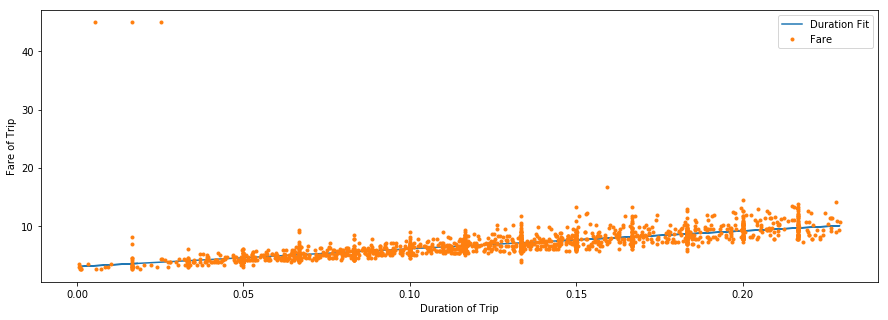

In [348]:
durationValues = durationModel.fittedvalues

fig = pl.figure(figsize=(15,5)) 
ax = fig.add_subplot(111)

pl.plot(newData['Duration'], durationValues, '-', label='Duration Fit')
pl.plot(newData['Duration'], newData['Fare'], '.')
ax.set_xlabel("Duration of Trip")
ax.set_ylabel("Fare of Trip")
pl.legend()
pl.show()

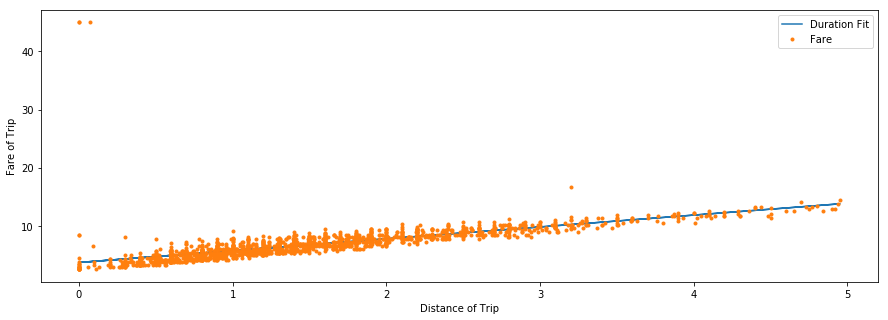

In [349]:
distanceValues = distanceModel.fittedvalues

fig = pl.figure(figsize=(15,5)) 
ax = fig.add_subplot(111)

pl.plot(newData['Trip Distance'], distanceValues, '-', label='Duration Fit')
pl.plot(newData['Trip Distance'], newData['Fare'], '.')
ax.set_xlabel("Distance of Trip")
ax.set_ylabel("Fare of Trip")
pl.legend()
pl.show()

**Figure 3:** Well look at that! As the distance goes higher, there are fewer points compared to duration. Yet, distance still has a better R-squared. But it still makes more sense for duration.

## Create two multivariate linear model to predict the tip percentage

In [351]:
df = pd.DataFrame({'y':newData['Tip Percent'], 'x1':newData['Destination Income'], 'x2':newData['Departure Income']})
multivariateModel_1 = smf.ols('y ~ x1 + x2', data=df).fit()
multivariateModel_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     3.708
Date:                Thu, 26 Oct 2017   Prob (F-statistic):             0.0247
Time:                        20:20:51   Log-Likelihood:                -6705.8
No. Observations:                1868   AIC:                         1.342e+04
Df Residuals:                    1865   BIC:                         1.343e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.1314      0.645      6.410      0.000       2.867       5.396
x1             0.0053      0.003      1.817      0.069      -0.000       0.011
x2            -0.0062      0.003     -1.985      0.047      -0.012   -7.32e-05
==============================================================================
Omnibus:                      770.374   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2555.476
Skew:                           2.135   Prob(JB):                         0.00
Kurtosis:                       6.822   Cond. No.                         671.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [353]:
df = pd.DataFrame({'y':newData['Tip Percent'], 'x1':newData['Trip Distance'], 'x2':newData['Duration']})
multivariateMode_2 = smf.ols('y ~ x1 + x2', data=df).fit()
multivariateMode_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     11.65
Date:                Thu, 26 Oct 2017   Prob (F-statistic):           9.40e-06
Time:                        20:21:15   Log-Likelihood:                -6697.9
No. Observations:                1868   AIC:                         1.340e+04
Df Residuals:                    1865   BIC:                         1.342e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.6017      0.508      5.126      0.000       1.606       3.597
x1             1.2567      0.313      4.016      0.000       0.643       1.870
x2            -4.0558      5.199     -0.780      0.435     -14.253       6.141
==============================================================================
Omnibus:                      788.307   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2752.863
Skew:                           2.160   Prob(JB):                         0.00
Kurtosis:                       7.088   Cond. No.                         50.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [355]:
df = pd.DataFrame({'y':newData['Tip Percent'], 'x1':newData['Destination Income'], 'x2':newData['Departure Income'],
                  'x3':newData['Trip Distance'], 'x4':newData['Duration']})
multivariateModel_3 = smf.ols('y ~ x1 + x2 + x3 + x4', data=df).fit()
multivariateModel_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     7.519
Date:                Thu, 26 Oct 2017   Prob (F-statistic):           5.25e-06
Time:                        20:25:21   Log-Likelihood:                -6694.5
No. Observations:                1868   AIC:                         1.340e+04
Df Residuals:                    1863   BIC:                         1.343e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.6163      0.793      3.297      0.001       1.060       4.172
x1             0.0056      0.003      1.923      0.055      -0.000       0.011
x2            -0.0052      0.003     -1.688      0.092      -0.011       0.001
x3             1.2463      0.313      3.976      0.000       0.632       1.861
x4            -4.2335      5.201     -0.814      0.416     -14.434       5.967
==============================================================================
Omnibus:                      783.057   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2713.202
Skew:                           2.147   Prob(JB):                         0.00
Kurtosis:                       7.052   Cond. No.                     5.46e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.46e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Compare multivariate linear model to predict the tip percentage and assess importance of socioeconomic variables

**Interpretation:** If we regressed all of the variables, the coefficients for the departure and destination zipcode per capita income are low!! They also have high p-values! So, just because you're poor or you're rich doesn't mean you're gonna be stingy with tips!!!! (Actually, since most people don't give tips, I think that's actually what's driving all this.) But duration has the highest coefficient, though an awfully high p-value. Which leaves us with the positive and significant coefficient for distance. Which makes sense in that if you're gonna go to JFK or LaGaurdia, you're probably gonna give a tip. Maybe you're a businessperson on the way to take a flight and your company will pay for the fare and tip.

But let us look at the two different multivariate OLS regressions. The one that is trip duration and distance has a higher R-squared value than the one using area incomes as variables. So we can see that this is perhaps a model that explains more of the data. Then let us look at each coefficient's p-value. For trip duration and distance, duration has such a high p-value that this coefficient is not significant. But distance has a zero p-value! When we look at origin and destination incomes, destination is above 0.05 and origin is almost at 0.05. Thus we cannot really consider these coefficients as significant explainers of tip percentage variation.

One of the real problems here is that there really is no variation in our data. That is there is hardly any distribution. Almost everyone doesn't tip! (Honestly, I've never tipped in a cab...I didn't know you were supposed to and now I feel really bad. Are we supposed to? UGH. Can America just get rid of tipping and just pay people - you know - a living wage? It would do a lot for socioeconomic fairness and also my social anxiety.) Let's do all this if we get rid of zero percentage tips, shall we?

## Look at this all again with actual tips

In [356]:
newerData = data[data['Tip Percent'] > 0]

In [357]:
df = pd.DataFrame({'y':newerData['Tip Percent'], 'x1':newerData['Destination Income'], 'x2':newerData['Departure Income'],
                  'x3':newerData['Trip Distance'], 'x4':newerData['Duration']})
multivariateModel_4 = smf.ols('y ~ x1 + x2 + x3 + x4', data=df).fit()
multivariateModel_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     6.133
Date:                Thu, 26 Oct 2017   Prob (F-statistic):           7.73e-05
Time:                        20:35:38   Log-Likelihood:                -2400.1
No. Observations:                 586   AIC:                             4810.
Df Residuals:                     581   BIC:                             4832.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     26.4407      2.103     12.570      0.000      22.310      30.572
x1            -0.0003      0.008     -0.044      0.965      -0.016       0.015
x2            -0.0056      0.009     -0.605      0.545      -0.024       0.013
x3             0.3215      0.350      0.918      0.359      -0.366       1.009
x4           -26.0164      7.052     -3.689      0.000     -39.866     -12.167
==============================================================================
Omnibus:                      885.584   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           260073.239
Skew:                           8.388   Prob(JB):                         0.00
Kurtosis:                     104.833   Cond. No.                     2.51e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.51e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Interpretation:** Well there. The only coefficient that is significant is trip duration. And basically the longer your trip, the less you're gonna tip! Well, that makes sense if you're an impatient New Yorker and a cabbie has decided he thinks you're a tourist that he can take on the longer route.

In [360]:
X = sm.add_constant(newData['Duration'])
durationModel2 = sm.OLS(endog=newData['Fare'], exog=X).fit()
durationModel2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Fare   R-squared:                       0.403
Model:                            OLS   Adj. R-squared:                  0.403
Method:                 Least Squares   F-statistic:                     1260.
Date:                Thu, 26 Oct 2017   Prob (F-statistic):          2.51e-211
Time:                        20:37:44   Log-Likelihood:                -3933.8
No. Observations:                1868   AIC:                             7872.
Df Residuals:                    1866   BIC:                             7883.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9798      0.115     25.844      0.000       2.754       3.206
Duration      30.7304      0.866     35.496      0.000      29.032      32.428
==============================================================================
Omnibus:                     3637.991   Durbin-Watson:                   1.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          7264093.002
Skew:                          14.880   Prob(JB):                         0.00
Kurtosis:                     307.045   Cond. No.                         19.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [361]:
X = sm.add_constant(newData['Trip Distance'])
distanceModel2 = sm.OLS(endog=newData['Fare'], exog=X).fit()
distanceModel2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Fare   R-squared:                       0.490
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                     1790.
Date:                Thu, 26 Oct 2017   Prob (F-statistic):          8.12e-275
Time:                        20:38:01   Log-Likelihood:                -3787.5
No. Observations:                1868   AIC:                             7579.
Df Residuals:                    1866   BIC:                             7590.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             3.6953      0.083     44.281      0.000       3.532       3.859
Trip Distance     2.0385      0.048     42.307      0.000       1.944       2.133
==============================================================================
Omnibus:                     3988.094   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         12871888.329
Skew:                          18.235   Prob(JB):                         0.00
Kurtosis:                     408.028   Cond. No.                         4.30
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [362]:
df = pd.DataFrame({'y':newerData['Tip Percent'],'x3':newerData['Trip Distance'], 'x4':newerData['Duration']})
multivariateModel_4 = smf.ols('y ~ x3 + x4', data=df).fit()
multivariateModel_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     12.12
Date:                Thu, 26 Oct 2017   Prob (F-statistic):           6.98e-06
Time:                        20:38:37   Log-Likelihood:                -2400.3
No. Observations:                 586   AIC:                             4807.
Df Residuals:                     583   BIC:                             4820.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     25.5806      1.084     23.607      0.000      23.452      27.709
x3             0.3488      0.347      1.006      0.315      -0.332       1.030
x4           -26.2609      7.030     -3.736      0.000     -40.068     -12.454
==============================================================================
Omnibus:                      884.626   Durbin-Watson:                   2.063
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           258962.593
Skew:                           8.371   Prob(JB):                         0.00
Kurtosis:                     104.615   Cond. No.                         49.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [363]:
df = pd.DataFrame({'y':newData['Tip Percent'], 'x1':newData['Destination Income'], 'x2':newData['Departure Income'],})
multivariateModel_5 = smf.ols('y ~ x1 + x2', data=df).fit()
multivariateModel_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     3.708
Date:                Thu, 26 Oct 2017   Prob (F-statistic):             0.0247
Time:                        20:39:21   Log-Likelihood:                -6705.8
No. Observations:                1868   AIC:                         1.342e+04
Df Residuals:                    1865   BIC:                         1.343e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.1314      0.645      6.410      0.000       2.867       5.396
x1             0.0053      0.003      1.817      0.069      -0.000       0.011
x2            -0.0062      0.003     -1.985      0.047      -0.012   -7.32e-05
==============================================================================
Omnibus:                      770.374   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2555.476
Skew:                           2.135   Prob(JB):                         0.00
Kurtosis:                       6.822   Cond. No.                         671.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Interpretation:** That is a really, really low r-squared value and pretty high p-values. Per capita income of origin and destination zipcodes have no bearing on tip percentage when we take out zero percent tips. What is interesting is that when we run a multivariate regression of duration and distance together, we get a lower r-squared value than if we run them separately. One of the problems we have here is that these two variables are endogenous!!!!!! BIG NOOOOOPE there! Of course your duration is going to be partially affected by your distance traveled!!!! We need to figure out a better variable.